# Import Libraries

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import (
                                    LinearRegression, 
                                    Ridge,
                                    Lasso, 
                                    ElasticNet
                                    )

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import (
                                    GridSearchCV, 
                                    RandomizedSearchCV, 
                                    cross_val_score
                                    )
from skopt import BayesSearchCV

# Load Dataset

In [204]:
df = pd.read_csv("used_cars_preprocessed.csv")
display(df.head())
display(df.info())

,selling_price,engine_CC,max_power_BHP,torque_Nm,age,bhp_to_engineCC_ratio,bhp_to_torque_rpm,price_to_km,price_to_owner_ratio,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Individual,transmission_Automatic,transmission_Manual
0,0.042126,0.209396,0.1850,0.239848,0.162162,0.291879,0.160950,0.001265,0.021495,1,0,0,1,0,1
1,0.034102,0.293289,0.2588,0.315990,0.162162,0.340172,0.180125,0.001260,0.021188,1,0,0,1,0,1
2,0.012839,0.292953,0.1950,0.200947,0.378378,0.256483,0.110548,0.000410,0.010594,0,1,0,1,0,1
3,0.019559,0.259060,0.2250,0.200947,0.270270,0.317353,0.142364,0.000690,0.009980,1,0,0,1,0,1
4,0.010030,0.226174,0.2205,0.200947,0.351351,0.334487,0.125004,0.000391,0.005118,0,1,0,1,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8033 entries, 0 to 8032
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   selling_price           8033 non-null   float64
 1   engine_CC               8033 non-null   float64
 2   max_power_BHP           8033 non-null   float64
 3   torque_Nm               8033 non-null   float64
 4   age                     8033 non-null   float64
 5   bhp_to_engineCC_ratio   8033 non-null   float64
 6   bhp_to_torque_rpm       8033 non-null   float64
 7   price_to_km             8033 non-null   float64
 8   price_to_owner_ratio    8033 non-null   float64
 9   fuel_Diesel             8033 non-null   int64  
 10  fuel_Petrol             8033 non-null   int64  
 11  seller_type_Dealer      8033 non-null   int64  
 12  seller_type_Individual  8033 non-null   int64  
 13  transmission_Automatic  8033 non-null   int64  
 14  transmission_Manual     8033 non-null   

None

# Single Variable LinearRegression

In [229]:
# مشخص کردن X, y
X = df[['price_to_km']]
y = df['selling_price']


# جدا کردن داده های اموزش و تست
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ایجاد نمونه از کلاس رگرسیون 
slr_model = LinearRegression()

# اموزش مدل
slr_model.fit(X_train, y_train)

# پیشبینی داده های اموزشی
y_pred = slr_model.predict(X_test)

# بررسی مدل
r2 = r2_score(y_test, y_pred)
score = slr_model.score(X, y)
mse = mean_squared_error(y_pred, y_test)

# Show Results
print(f"SLR MSE: {mse}")
print(f"SLR R-Squared: {r2}")
print(f"SLR Score: {score}")

SLR MSE: 0.004158179875145347
SLR R-Squared: 0.4502416981463868
SLR Score: 0.38995782745705065


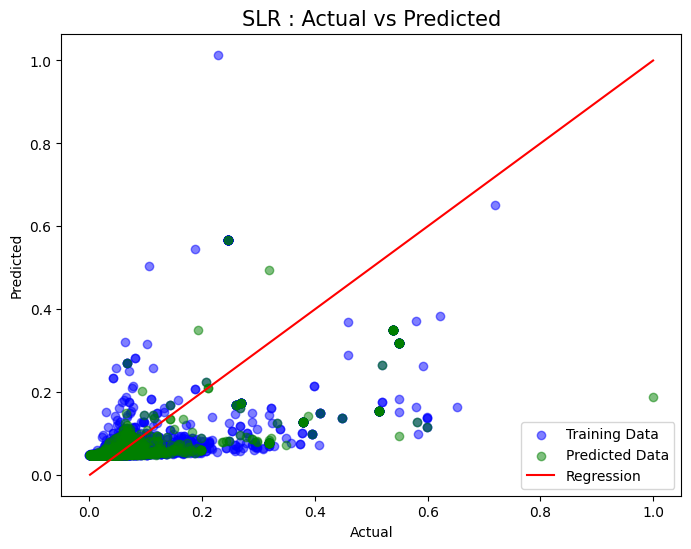

In [233]:
# رسم نمودار
plt.figure(figsize=(8, 6))

# نمودار داده‌های آموزشی
plt.scatter(y_train, slr_model.predict(X_train), color='blue', alpha=0.5, label='Training Data')

# نمودار داده‌های پیش‌بینی شده
plt.scatter(y_test, y_pred, color='green', alpha=0.5, label='Predicted Data')

# خط Regression
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '-', color='red', label="Regression")

plt.title('SLR : Actual vs Predicted', fontsize=15)
plt.xlabel('Actual', fontsize=10)
plt.ylabel('Predicted', fontsize=10)
plt.legend()
plt.show()


# Multi-Variable LinearRegression

In [234]:
X = df.drop(['selling_price'], axis=1)
y = df['selling_price']

# جدا کردن داده های اموزش و تست
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ایجاد نمونه از کلاس رگرسیون 
mlr_model = LinearRegression()

# اموزش مدل
mlr_model.fit(X_train, y_train)

# پیشبینی داده های اموزشی
y_pred = mlr_model.predict(X_test)

# بررسی مدل
r2 = r2_score(y_test, y_pred)
score = mlr_model.score(X, y)
mse = mean_squared_error(y_pred, y_test)

# Show Results
print(f"MLR MSE: {mse}")
print(f"MLR R-Squared: {r2}")
print(f"MLR Score: {score}")

MLR MSE: 0.0002607797783928765
MLR R-Squared: 0.9655219705660236
MLR Score: 0.9363083105206436


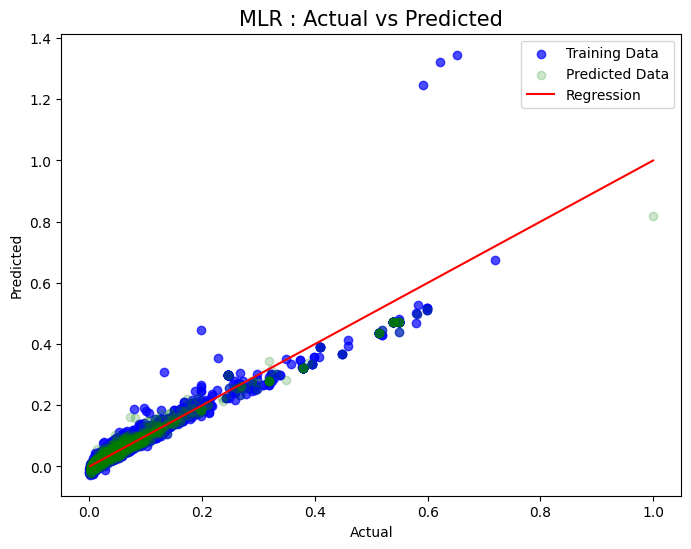

In [235]:
# رسم نمودار
plt.figure(figsize=(8, 6))

# نمودار داده‌های آموزشی
plt.scatter(y_train, mlr_model.predict(X_train), color='blue', alpha=0.7, label='Training Data')

# نمودار داده‌های پیش‌بینی شده
plt.scatter(y_test, y_pred, color='green', alpha=0.2, label='Predicted Data')

# خط Regression
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '-', color='red', label='Regression')

plt.title('MLR : Actual vs Predicted', fontsize=15)
plt.xlabel('Actual', fontsize=10)
plt.ylabel('Predicted', fontsize=10)
plt.legend()
plt.show()


# Polynomial Regression

In [236]:
X = df[['engine_CC', 'max_power_BHP', 'torque_Nm', 'age',
       'bhp_to_engineCC_ratio', 'bhp_to_torque_rpm', 'price_to_km',
       'price_to_owner_ratio', 'fuel_Diesel', 'fuel_Petrol']]

y = df['selling_price']


# جدا کردن داده های اموزش و تست
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ایجاد نمونه از کلاس رگرسیون 
poly_model = LinearRegression()
pf = PolynomialFeatures(degree=3)

# تدبیل و اموزش داده های اموزشی
X_train_poly = pf.fit_transform(X_train)
X_test_poly = pf.fit_transform(X_test)

# اموزش مدل
poly_model.fit(X_train_poly, y_train)

# پیشبینی با مدل
y_pred = poly_model.predict(X_test_poly)

# بررسی مدل
r2 = r2_score(y_test, y_pred)
score = poly_model.score(X_test_poly, y_test)
mse = mean_squared_error(y_pred, y_test)

# Show Results
print(f"Polynomial MSE: {mse}")
print(f"Polynomial R-Squared: {r2}")
print(f"Polynomial Score: {score}")


Polynomial MSE: 0.00013872225699924714
Polynomial R-Squared: 0.9816593522341213
Polynomial Score: 0.9816593522341213


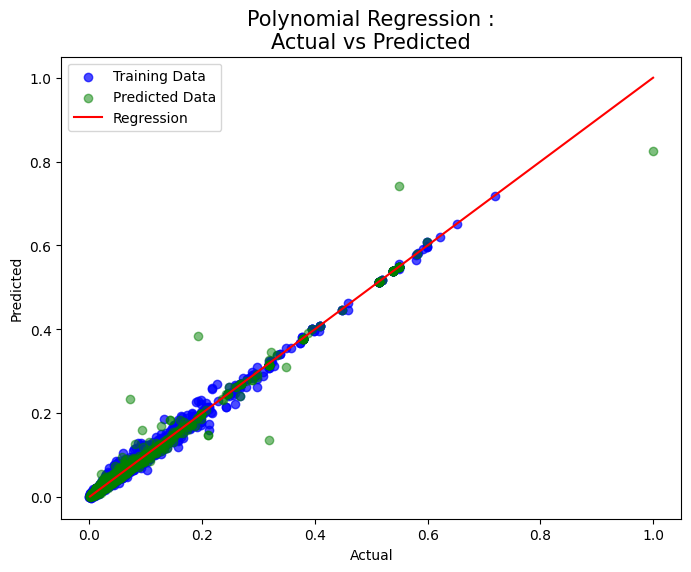

In [240]:
# رسم نمودار
plt.figure(figsize=(8, 6))

# نمودار داده‌های آموزشی
plt.scatter(y_train, poly_model.predict(X_train_poly), color='blue', alpha=0.7, label='Training Data')

# نمودار داده‌های پیش‌بینی شده
plt.scatter(y_test, y_pred, color='green', alpha=0.5, label='Predicted Data')

# خط Regression
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '-', color='red', label='Regression')

plt.title('Polynomial Regression :\nActual vs Predicted', fontsize=15)
plt.xlabel('Actual', fontsize=10)
plt.ylabel('Predicted', fontsize=10)
plt.legend()
plt.show()

# Ridge Regression

In [241]:
X = df.drop('selling_price', axis=1)
y = df['selling_price']


# جدا کردن داده های اموزش و تست
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ایجاد نمونه از کلاس رگرسیون 
ridge_model = Ridge()

# اموزش مدل
ridge_model.fit(X_train, y_train)

# پیشبینی با مدل
y_pred = ridge_model.predict(X_test)

# بررسی مدل
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


# Show Results
print(f"Ridge MSE: {mse}")
print(f"Ridge R-Squared: {r2}")

Ridge MSE: 0.0004035521645315206
Ridge R-Squared: 0.9466458500248396


### Ridge Regression Hyperparameter Optimization Using BayesOptimization

In [242]:
ridge_model = Ridge()
params = {'alpha': [1e-4,1e-3,1e-2,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}

opt = BayesSearchCV(
                    estimator=ridge_model,
                    search_spaces=params,
                    n_iter=5,
                    cv=10,
                    verbose=1,
                    scoring="r2")

opt.fit(X_train, y_train)

print("Bayesian Optimization : \n===============================")
print("Best parameters:", opt.best_params_)
print("Best R2 Score:", opt.best_score_)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Bayesian Optimization : 
Best parameters: OrderedDict([('alpha', 0.3)])
Best R2 Score: 0.9226249672614246


### Ridge Regression Tuned
ساخت مدل جدید بر اساس هایپرپارامتر مشخص شده در سلول قبل

In [243]:
# ایجاد شی جدید با هایپرپارمتر های مشخص شده
ridge_model_tuned = Ridge(alpha=0.4)

# اموزش مدل
ridge_model_tuned.fit(X_train, y_train)

# پیشبینی با مدل
y_pred = ridge_model_tuned.predict(X_test)

# بررسی مدل
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


# Show Results
print(f"Ridge MSE: {mse}")
print(f"Ridge R-Squared: {r2}")

Ridge MSE: 0.00031615596021007593
Ridge R-Squared: 0.9582006144455416


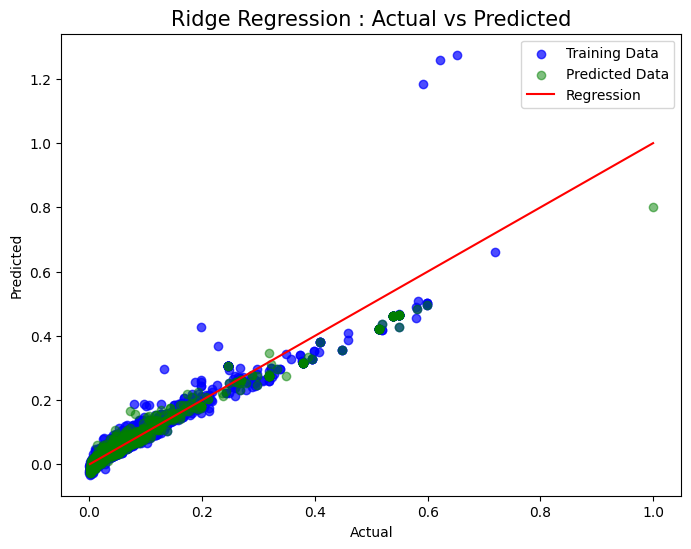

In [244]:
# رسم نمودار
plt.figure(figsize=(8, 6))

# نمودار داده‌های آموزشی
plt.scatter(y_train, ridge_model_tuned.predict(X_train), color='blue', alpha=0.7, label='Training Data')

# نمودار داده‌های پیش‌بینی شده
plt.scatter(y_test, y_pred, color='green', alpha=0.5, label='Predicted Data')

# خط گرسیون
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '-', color='red', label='Regression')

plt.title('Ridge Regression : Actual vs Predicted', fontsize=15)
plt.xlabel('Actual', fontsize=10)
plt.ylabel('Predicted', fontsize=10)
plt.legend()
plt.show()


# Lasso Regression

In [245]:
X = df.drop('selling_price', axis=1)
y = df['selling_price']


# جدا کردن داده های اموزش و تست
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ایجاد شی از کلاس Lasso
lasso_model = Lasso()
# آموزش مدل
lasso_model.fit(X_train, y_train)

# پیشبینی با مدل
y_pred = lasso_model.predict(X_test)

# بررسی مدل
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Show Results
print(f"Lasso MSE: {mse}")
print(f"Lasso R-Squared: {r2}")

Lasso MSE: 0.007564464704337174
Lasso R-Squared: -0.00010759398488890959


### Lasso Regression Hyperparameter Optimization Using BayesOptimization

In [246]:
lasso_model = Lasso()
params = {'alpha': [1e-4,1e-3,1e-2,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
opt = BayesSearchCV(
                    estimator=lasso_model,
                    search_spaces=params,
                    n_iter=20,
                    cv=5,
                    verbose=1,
                    scoring="r2")

opt.fit(X_train, y_train)

print("Bayesian Optimization : \n===============================")
print("Best parameters:", opt.best_params_)
print("Best R2 Score:", opt.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

### Lasso Regression Tuned
ساخت مدل جدید بر اساس هایپرپارامتر مشخص شده در سلول قبل

In [247]:
# ایجاد شی جدید با هایپرپارمتر های مشخص شده
lasso_model_tuned = Lasso(alpha=0.0001)
# آموزش مدل
lasso_model_tuned.fit(X_train, y_train)

# پیشبینی با مدل
y_pred = lasso_model_tuned.predict(X_test)

# بررسی مدل
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Show Results
print(f"Lasso MSE: {mse}")
print(f"Lasso R-Squared: {r2}")

Lasso MSE: 0.00032021959357957585
Lasso R-Squared: 0.9576633562586303


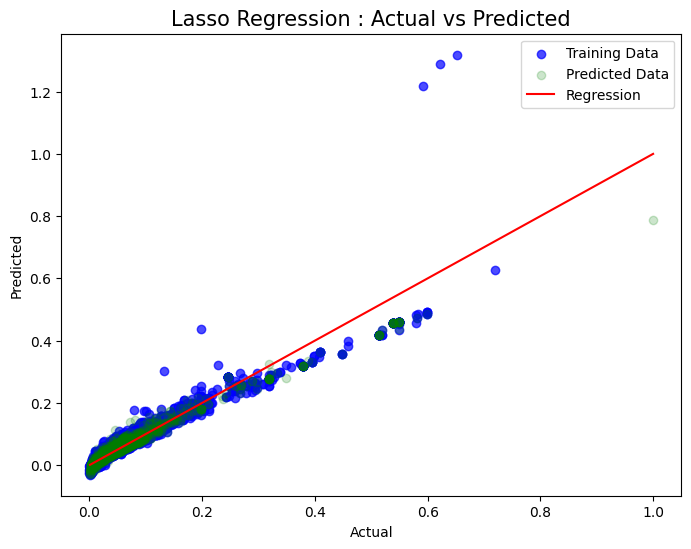

In [248]:
# رسم نمودار
plt.figure(figsize=(8, 6))

# نمودار داده‌های آموزشی
plt.scatter(y_train, lasso_model_tuned.predict(X_train), color='blue', alpha=0.7, label='Training Data')

# نمودار داده‌های پیش‌بینی شده
plt.scatter(y_test, y_pred, color='green', alpha=0.2, label='Predicted Data')

# خط رگرسیون
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '-', color='red', label='Regression')

plt.title('Lasso Regression : Actual vs Predicted', fontsize=15)
plt.xlabel('Actual', fontsize=10)
plt.ylabel('Predicted', fontsize=10)
plt.legend()
plt.show()

# ElasticNet Regression

In [249]:
X = df.drop('selling_price', axis=1)
y = df['selling_price']


# جدا کردن داده های اموزش و تست
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ایجاد شی از کلاس Lasso
elastic_model = ElasticNet()
# آموزش مدل
elastic_model.fit(X_train, y_train)

# پیشبینی با مدل
y_pred = elastic_model.predict(X_test)

# بررسی مدل
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


# Show Results
print(f"ElasticNet MSE: {mse}")
print(f"ElasticNet R-Squared: {r2}")


ElasticNet MSE: 0.007564464704337174
ElasticNet R-Squared: -0.00010759398488890959


### ElasticNet Regression Hyperparameter Optimization Using CrossValidation

In [250]:
alphas = [1e-4,1e-3,1e-2,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
l1_ratios = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]

params_dict = [{'alpha': alpha, 'l1_ratio': l1_ratio} for alpha in alphas for l1_ratio in l1_ratios]

models = [ElasticNet(alpha=params['alpha'], l1_ratio=params['l1_ratio']) for params in params_dict]


cv_scores = [cross_val_score(model, X_train, y_train, cv=10, scoring='r2').mean() for model in models]

best_model_index = np.argmax(cv_scores)
best_model_params = params_dict[best_model_index]
print("cross_val_score : \n")
print("Best Parameters:", best_model_params)
print("Best R2 Score:", cv_scores[best_model_index])

cross_val_score : 

Best Parameters: {'alpha': 0.0001, 'l1_ratio': 0.1}
Best R2 Score: 0.9209178739334931


### ElasticNet Regression Tuned
ساخت مدل جدید بر اساس هایپرپارامتر مشخص شده در سلول قبل

In [251]:
# ایجاد شی جدید با هایپرپارمتر های مشخص شده
elastic_model_tuned = ElasticNet(alpha=0.0001, l1_ratio=0.1)

# آموزش مدل
elastic_model_tuned.fit(X_train, y_train)

# پیشبینی با مدل
y_pred = elastic_model_tuned.predict(X_test)

# بررسی مدل
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


# Show Results
print(f"ElasticNet MSE: {mse}")
print(f"ElasticNet R-Squared: {r2}")

ElasticNet MSE: 0.00034923738277635105
ElasticNet R-Squared: 0.9538268770799109


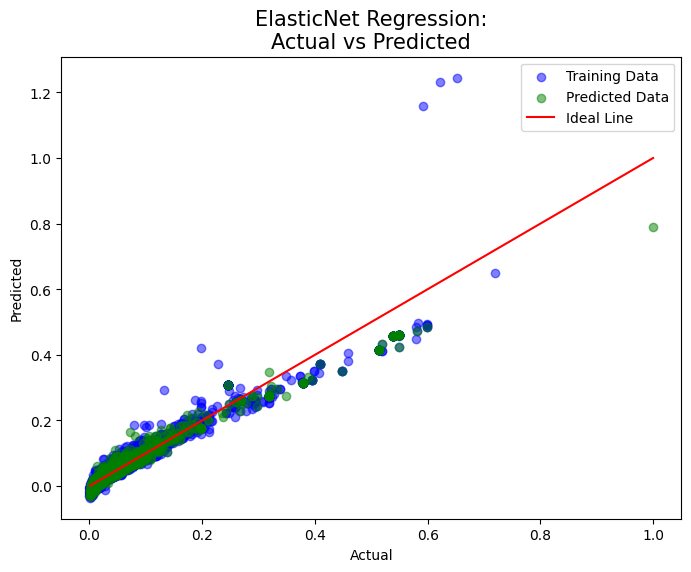

In [252]:
# رسم نمودار
plt.figure(figsize=(8, 6))

# نمودار داده‌های آموزشی
plt.scatter(y_train, elastic_model_tuned.predict(X_train), color='blue', alpha=0.5, label='Training Data')

# نمودار داده‌های پیش‌بینی شده
plt.scatter(y_test, y_pred, color='green', alpha=0.5, label='Predicted Data')

# خط رگرسیون
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '-', color='red', label='Ideal Line')

plt.title('ElasticNet Regression:\nActual vs Predicted', fontsize=15)
plt.xlabel('Actual', fontsize=10)
plt.ylabel('Predicted', fontsize=10)
plt.legend()
plt.show()